## Python Setup

Import der benötigten Bibliotheken:

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* **Pandas**: Bearbeitung und Analyse von Daten ([Dokumentation](https://pandas.pydata.org/))

* **Matplotlib**: Erstellung von Abbildungen ([Dokumentation](https://matplotlib.org/))

* **Seaborn**: Vereinfachte Erstellung von statistischen Abbildungen - auf Basis von Matplotlib. ([Dokumentation](https://seaborn.pydata.org/))

# Daten

Daten (CSV-Datei) mit Hilfe von pandas aus einem GitHub-Repository importieren und mit der Bezeichnung `df` speichern.

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/kirenz/daten/main/statistik/00-1-shipman-opfer.csv')

Wir verschaffen uns zunächst einen Überblick über die Daten. 

In [23]:
# Überblick
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateofDeath          215 non-null    object 
 1   Name                 215 non-null    object 
 2   Age                  215 non-null    int64  
 3   PlaceofDeath         215 non-null    object 
 4   Decision             215 non-null    object 
 5   yearOfDeath          215 non-null    int64  
 6   gender               215 non-null    int64  
 7   fractionalDeathYear  215 non-null    float64
 8   ageBracket           215 non-null    object 
 9   gender2              215 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 16.9+ KB


In [24]:
# Tabellenkopf (erste 5 Zeilen)
df.head()

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


In [25]:
# Die letzten 3 Zeilen der Tabelle anzeigen lassen
df.tail(3)

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
212,11-May-98,Winifred Mellor,73,Own home,Conviction,1998,0,1997.86,70-74,Women
213,12-Jun-98,Joan May Melia,73,Own home,Conviction,1998,0,1997.95,70-74,Women
214,24-Jun-98,Kathleen Grundy,81,Own home,Conviction,1998,0,1997.98,80-84,Women


Daten bei Bedarf anpassen

In [26]:
# Löschen von fractionalDeathYear
df.drop(['fractionalDeathYear'], axis=1, inplace=True)

In [27]:
# Übersicht über Datenformate
df.dtypes

DateofDeath     object
Name            object
Age              int64
PlaceofDeath    object
Decision        object
yearOfDeath      int64
gender           int64
ageBracket      object
gender2         object
dtype: object

In [28]:
# Anpassung der Variable gender
df["gender"] = df["gender"].astype("category")

In [29]:
# Prüfung, ob Anpassung erfolgreich war
df.dtypes

DateofDeath       object
Name              object
Age                int64
PlaceofDeath      object
Decision          object
yearOfDeath        int64
gender          category
ageBracket        object
gender2           object
dtype: object

In [30]:
# Änderung der Einträge in Variable gender (von 0 zu Weiblich und 1 zu Männlich)
df = df.replace({'gender': {0:'Weiblich', 1:'Männlich'}})

In [31]:
# Prüfung, ob Änderung erfolgreich war
df.gender.head()

0    Weiblich
1    Weiblich
2    Weiblich
3    Männlich
4    Weiblich
Name: gender, dtype: object

In [32]:
# Umbenennung von Variablen
df.rename(columns={ 'Age': 'Alter', 
                    'yearOfDeath': 'Todesjahr', 
                    'gender': 'Geschlecht'}, 
                    inplace=True)

# Analyse

In [33]:
df.describe()

,Alter,Todesjahr
count,215.000000,215.000000
mean,76.186047,1992.376744
std,9.625841,5.322534
min,41.000000,1975.000000
25%,72.000000,1988.000000
50%,77.000000,1995.000000
75%,83.000000,1997.000000
max,93.000000,1998.000000


## Streudiagramm

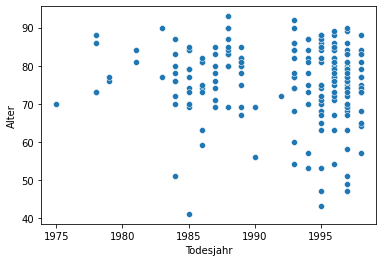

In [34]:
sns.scatterplot(data=df, x="Todesjahr", y="Alter");

## Streudiagramm mit Geschlecht

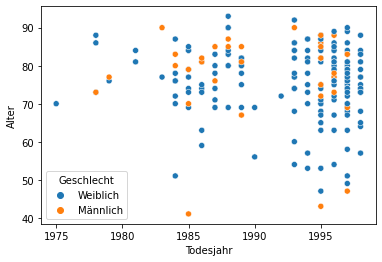

In [35]:
sns.scatterplot(data=df, x="Todesjahr", y="Alter", hue="Geschlecht");

## Streudiagramm mit Dichtefunktion

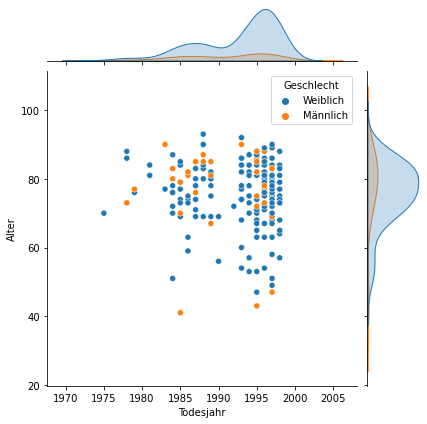

In [36]:
sns.jointplot(data=df, x="Todesjahr", y="Alter", hue="Geschlecht");